In [3]:
import json
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df_main = pd.read_csv("/content/drive/My Drive/Colab Notebooks/df_merged5.csv")
df_refer = pd.read_csv("/content/drive/My Drive/Colab Notebooks/df_mer_ref4.csv")

In [ ]:
!pip install pyLDAvis==2.1.2
import nltk
nltk.download(['stopwords', 'wordnet', 'omw-1.4'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 8.9 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=b6314e72b5b30682d14fb875a00dbefd75cda408e936bb09130ce8d8f15225d0
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#LDA Topic modeling
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import re

def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatization(texts):
    
    texts_out = []
    for text in texts:
        doc = preprocess(text)
        new_text = []
        for token in doc:
            new_text.append(wordnet_lemmatizer.lemmatize(token, pos="v"))
        new_text2 = []
        for token in new_text:
            new_text2.append(wordnet_lemmatizer.lemmatize(token, pos="n"))
        final = " ".join(new_text2)
        texts_out.append(final)
    return (texts_out)


In [2]:
string_list =[]
for ab in df_refer['ref_abstract']:
    ab = preprocess(ab)
    ab = lemmatization(ab)
    string_list.append(ab)

print(string_list)




NameError: ignored

In [1]:
string_list2 = []
for liste in string_list:
  for word in liste:
    string_list2.append(word)

NameError: ignored

In [ ]:
data = " ".join([item for item in string_list2])

In [ ]:
print(data[:40])

present component limit hardware method 


In [ ]:
id2word = corpora.Dictionary([string_list2])

corpus = []
for text in string_list:
    new = id2word.doc2bow(text)
    corpus.append(new)



#word = id2word[corpus]
#print (word)

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [ ]:
topics = list(lda_model.show_topics())

In [ ]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  -4.703357702396761


In [ ]:

coherence_values = []
model_list = []
for num_topics in range(2, 42, 5):
    model=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, corpus=corpus, dictionary=id2word, coherence='u_mass')
    coherence_values.append(coherencemodel.get_coherence())

  

In [ ]:
print(coherence_values)

[-1.3173820329888035, -1.5235747504778328, -1.6457549581938258, -2.057579402928987, -2.0344580489749675, -2.5292106027999535, -3.0321244241550356, -2.933517204056035]


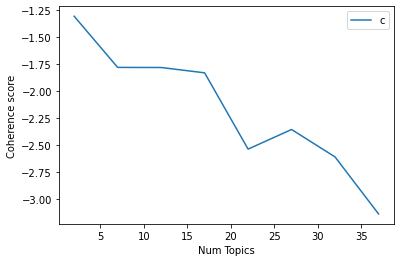

In [ ]:
# Show graph
import matplotlib.pyplot as plt
limit=42; start=2; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
coherence_values = []
model_list = []
for num_topics in range(30, 40, 1):
    model=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, corpus=corpus, dictionary=id2word, coherence='u_mass')
    coherence_values.append(coherencemodel.get_coherence())


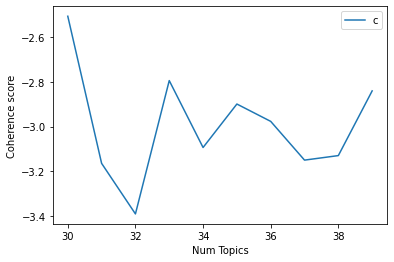

In [ ]:
# Show graph
import matplotlib.pyplot as plt
limit=40; start=30; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=32,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=32)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.242920  0.485813       1        1  30.215522
10     0.521608  0.080697       2        1  11.146970
29    -0.227474  0.450708       3        1   8.892250
3     -0.088832  0.488375       4        1   3.836694
16     0.446040 -0.246427       5        1   3.751739
31     0.482520 -0.092435       6        1   3.723423
13     0.075234  0.451685       7        1   3.056684
6     -0.437713 -0.284454       8        1   2.847515
19    -0.438290  0.227183       9        1   2.648229
0      0.285487  0.340624      10        1   2.639148
21     0.413535  0.242818      11        1   2.354665
27    -0.024547  0.324852      12        1   2.166629
26    -0.471009  0.065627      13        1   2.132795
5     -0.323071  0.329992      14        1   2.044637
15    -0.020559 -0.160951      15        1   1.757379
9     -0.276612  0.167094      16        1   1.513829
23    -0.097339  0.088090      17        1   1.352100
12    -0.467798 -0.081104      18        1   1.314423
28     0.074235  0.103762      19        1   1.281697
8      0.338275  0.056771      20        1   1.143139
22    -0.257524 -0.026154      21        1   1.142898
17     0.175548 -0.456422      22        1   1.114595
4      0.204271  0.165651      23        1   1.007262
14    -0.133690 -0.454044      24        1   0.927881
1     -0.332069 -0.184306      25        1   0.905175
7      0.203539 -0.097928      26        1   0.881544
24     0.305158 -0.312970      27        1   0.843030
11    -0.168457 -0.256530      28        1   0.762529
30     0.195292 -0.276860      29        1   0.745373
25     0.000748 -0.450535      30        1   0.714335
20    -0.248918 -0.371134      31        1   0.655687
18     0.049493 -0.317488      32        1   0.480224, topic_info=             Term          Freq         Total Category  logprob  loglift
25373     problem   8922.000000   8922.000000  Default  32.0000  32.0000
31681      system  11110.000000  11110.000000  Default  31.0000  31.0000
34520         use  21607.000000  21607.000000  Default  30.0000  30.0000
21174     network   6067.000000   6067.000000  Default  29.0000  29.0000
25673     provide   7873.000000   7873.000000  Default  28.0000  28.0000
...           ...           ...           ...      ...      ...      ...
3939   california     43.407354     44.363250  Topic32  -5.3322   5.3169
623           ago     43.332622     44.288518  Topic32  -5.3339   5.3169
8200      disable     40.647826     41.603721  Topic32  -5.3979   5.3154
11582    footstep     38.131450     39.087346  Topic32  -5.4618   5.3139
10165     erosion     38.350493     39.320412  Topic32  -5.4561   5.3137

[1153 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
83        31  0.991904       absolute
94        13  0.999350       abstract
96         7  0.997894    abstraction
133       22  0.996514     accelerate
137       32  0.981753  accelerometer
...      ...       ...            ...
35962     20  0.996437          worst
35971      8  0.999037          would
36000     22  0.997178          write
36060     16  0.994195            www
36259      3  0.999154           year

[1242 rows x 3 columns], R=32, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 11, 30, 4, 17, 32, 14, 7, 20, 1, 22, 28, 27, 6, 16, 10, 24, 13, 29, 9, 23, 18, 5, 15, 2, 8, 25, 12, 31, 26, 21, 19])

In [ ]:
LDA_topics = []
for index, row in df_main.iterrows():
    text = row['abstract']
    clean = preprocess(text)
    id2word = corpora.Dictionary([clean])
    corpus = [id2word.doc2bow(tokens) for tokens in [clean]]
    
    doc_lda = [lda_model.get_document_topics(corpus, minimum_probability=0 )]
    
    LDA_topics.append(doc_lda)
    
df_main['LDA_topics'] = LDA_topics



In [ ]:
ref_LDA_topics = []
for index, row in df_refer.iterrows():
    text = row['ref_abstract']
    clean = preprocess(text)
    id2word = corpora.Dictionary([clean])
    corpus = [id2word.doc2bow(tokens) for tokens in [clean]]
    
    doc_lda = [lda_model.get_document_topics(corpus, minimum_probability=0 )]
    
    ref_LDA_topics.append(doc_lda)
    
df_refer['ref_LDA_topics'] = ref_LDA_topics

In [ ]:
df2 = df_main[['id', 'LDA_topics']]

In [ ]:
df_refer = pd.merge(df_refer, df2, how='left', on = 'id')

In [ ]:

df_refer2.to_csv("/content/drive/My Drive/Colab Notebooks/df_mer_ref4.csv")

In [ ]:
#df_main = pd.read_csv("/content/drive/My Drive/Colab Notebooks/df_merged3.csv")
df_refer2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/df_mer_ref4.csv")

In [ ]:
df_refer['LDA_topics'].head()

0    [([(0, 0.030985162), (1, 0.018797703), (2, 0.1...
1    [([(0, 0.030964883), (1, 0.01879727), (2, 0.13...
2    [([(0, 0.030973159), (1, 0.018797891), (2, 0.1...
3    [([(0, 0.030968944), (1, 0.018797992), (2, 0.1...
4    [([(0, 0.038958117), (1, 0.018361134), (2, 0.1...
Name: LDA_topics, dtype: object

In [ ]:
Hellinger_sim = []

for index, row in df_refer.iterrows():
    text1 = row['abstract']
    text2 = row['ref_abstract']
    clean1 = preprocess(text1)
    clean2 = preprocess(text2)
    id2word1 = corpora.Dictionary([clean1])
    id2word2 = corpora.Dictionary([clean2])
    corpus1 = [id2word.doc2bow(tokens) for tokens in [clean1]]
    corpus2 = [id2word.doc2bow(tokens) for tokens in [clean2]]
    
    lda_vec1 = lda_model.get_document_topics(corpus1, minimum_probability=0 )
    lda_vec2 = lda_model.get_document_topics(corpus2, minimum_probability=0 )
   
    sim = gensim.matutils.hellinger(lda_vec1, lda_vec2)

 
    
    Hellinger_sim.append(sim)
  

df_refer['Hellinger_sim'] = Hellinger_sim



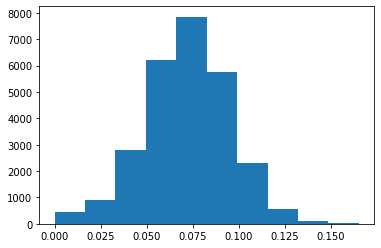

In [ ]:
from matplotlib import pyplot as plt



plt.hist(Hellinger_sim, 10)

plt.show()

In [ ]:

df_refer.to_csv("/content/drive/My Drive/Colab Notebooks/df_mer_ref5.csv")

In [ ]:
mean_LDA_sim = pd.pivot_table(df_refer, values=['Hellinger_sim'], 
                                                    index=['id'], columns=None, aggfunc='mean')
df_main2 = pd.merge(df_main, mean_LDA_sim,  on='id')

In [ ]:
sd_LDA_sim = pd.pivot_table(df_refer, values=['Hellinger_sim'], 
                                                    index=['id'], columns=None, aggfunc='std')
df_main2 = pd.merge(df_main2, sd_LDA_sim,  on='id')

In [ ]:
df_main2.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,abstract,authors,n_citation,references_x,title,venue,year,id,title_len,n_authors,n_references,ab_len,impact_1y,sentiment,negative,positive,LDA_topics,mean_BoW_Cos,mean_tfidf_Cos,mean_w2v_Cos,sd_Bow_Cos,sd_tfidf_Cos,sd_w2v_Cos,skew_ref_year,ref_year_y,med_ref_n_citation,skew_ref_n_citation,readability_score,pos_tag,verbs,verb_count,verb_ratio,Hellinger_sim_x,Hellinger_sim_y
0,0,0,0,A lack of security metrics signifies that it i...,"['Daniel Mellado', 'Eduardo Fernández-Medina',...",50,"['10b75e75-a047-4182-9e62-70dc936d7828', '1fa4...",A comparison of software design security metrics,european conference on software architecture,2010,4685d94f-92f2-4f30-ac01-716fa6b9bebd,7,64,10,132,0,"{'neg': 0.016, 'neu': 0.806, 'pos': 0.178, 'co...",0.016,0.178,"[([(0, 0.032591313), (1, 0.020107934), (2, 0.1...",57.800000,57.800000,97.624871,7.999053,7.999053,1.189633,2007.0,-0.901423,50.0,1.941277,39.282500,"[('lack', 'NN'), ('thus', 'RB'), ('existing', ...","['existing', 'study', 'meaning', 'exist', 'can...",16,0.121212,0.071237,0.008530
1,1,1,1,Inferring the relationship among proteins is a...,"['Tsuyoshi Kato', 'Kinya Okada', 'Hisashi Kash...",5,"['0e42b5be-f8f9-4e21-b824-e97a8dacb7f2', '40fc...",A Transfer Learning Approach and Selective Int...,International Journal of Knowledge Discovery i...,2010,09da7272-e296-4fbc-9b32-fe6280481e3f,16,71,13,111,0,"{'neg': 0.012, 'neu': 0.936, 'pos': 0.052, 'co...",0.012,0.052,"[([(0, 0.032590047), (1, 0.020106718), (2, 0.1...",46.151538,46.151538,96.517091,9.437822,9.437822,1.390865,2005.0,-1.253350,254.0,3.445573,34.022622,"[('perform', 'NN'), ('existing', 'VBG'), ('cen...","['existing', 'processes', 'predict', 'proposed...",13,0.117117,0.073640,0.025131
2,3,3,3,We consider a scheduling environment with m (m...,"['Joseph Y.-T. Leung', 'Michael Pinedo', 'Guoh...",139,"['0fb1bda8-1de2-4acb-bfac-8bdfbf7f0758', '37a5...",Competitive Two-Agent Scheduling and Its Appli...,Operations Research,2010,ea7a3609-3342-477a-ac8c-00d65a6c16e5,6,54,15,216,7348,"{'neg': 0.049, 'neu': 0.869, 'pos': 0.081, 'co...",0.049,0.081,"[([(0, 0.038333785), (1, 0.018845884), (2, 0.1...",53.536667,53.536667,96.997585,10.623476,10.623476,1.336878,2003.0,-0.762319,156.0,1.840840,53.229630,"[('agents', 'NNS'), ('function', 'NN'), ('prob...","['solve', 'availability', 'remained', 'conside...",17,0.078704,0.044833,0.021873
3,4,4,4,The increasing abundance of data about the tra...,"['Anna Monreale', 'Roberto Trasarti', 'Chiara ...",11,"['033ba9d6-18b8-4bfb-b9ca-f3a01bac5c85', '11ca...",Preserving privacy in semantic-rich trajectori...,advances in geographic information systems,2010,d3c00b34-560a-4593-9a83-a4512275805e,8,88,17,167,4570,"{'neg': 0.075, 'neu': 0.858, 'pos': 0.067, 'co...",0.075,0.067,"[([(0, 0.036335208), (1, 0.033975307), (2, 0.1...",52.542353,52.542353,97.845534,9.770623,9.770623,0.754648,2008.0,-0.652015,246.0,1.853376,45.155699,"[('threats', 'NNS'), ('model', 'VBP'), ('resul...","['model', 'linking', 'stopped', 'opening', 'tr...",22,0.131737,0.089979,0.012262
4,5,5,5,A variational phase field model is proposed fo...,"['Liyong Zhu', 'Yu Wang', 'Lili Ju', 'Desheng ...",50,"['2925bdbc-9cec-4cd0-a5c0-2688a1366b80', '3219...",A variational phase field method for curve smo...,Journal of Computational Physics,2010,76eccb84-3f46-414a-91f1-fbbfb292ed86,8,52,11,103,25006,"{'neg': 0.026, 'neu': 0.843, 'pos': 0.13, 'com...",0.026,0.130,"[([(0, 0.033736896), (1, 0.021077879), (2, 0.1...",54.053636,54.053636,96.840981,8.228775,8.228775,0.816638,2003.0,-1.197599,337.0,2.543480,37.559714,"[('function', 'NN'), ('developed', 'VBD'), ('e...","['developed', 'existing', 'preserved', 'propos...",13,0.126214,0.073205,0.007500


In [ ]:
df_main2.rename(columns={'skew_ref_year': 'med_ref_year', 'ref_year_y': 'skew_ref_year', 'Hellinger_sim_x': 'mean_LDA_Sim', 	'Hellinger_sim_y': 'sd_LDA_sim' }, inplace=True)

In [ ]:
df_main2.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,abstract,authors,n_citation,references_x,title,venue,year,id,title_len,n_authors,n_references,ab_len,impact_1y,sentiment,negative,positive,LDA_topics,mean_BoW_Cos,mean_tfidf_Cos,mean_w2v_Cos,sd_Bow_Cos,sd_tfidf_Cos,sd_w2v_Cos,med_ref_year,skew_ref_year,med_ref_n_citation,skew_ref_n_citation,readability_score,pos_tag,verbs,verb_count,verb_ratio,mean_LDA_Sim,sd_LDA_sim
0,0,0,0,A lack of security metrics signifies that it i...,"['Daniel Mellado', 'Eduardo Fernández-Medina',...",50,"['10b75e75-a047-4182-9e62-70dc936d7828', '1fa4...",A comparison of software design security metrics,european conference on software architecture,2010,4685d94f-92f2-4f30-ac01-716fa6b9bebd,7,64,10,132,0,"{'neg': 0.016, 'neu': 0.806, 'pos': 0.178, 'co...",0.016,0.178,"[([(0, 0.032586742), (1, 0.02010684), (2, 0.14...",57.800000,57.800000,97.624871,7.999053,7.999053,1.189633,2007.0,-0.901423,50.0,1.941277,39.282500,"[('lack', 'NN'), ('thus', 'RB'), ('existing', ...","['existing', 'study', 'meaning', 'exist', 'can...",16,0.121212,0.071237,0.008530
1,1,1,1,Inferring the relationship among proteins is a...,"['Tsuyoshi Kato', 'Kinya Okada', 'Hisashi Kash...",5,"['0e42b5be-f8f9-4e21-b824-e97a8dacb7f2', '40fc...",A Transfer Learning Approach and Selective Int...,International Journal of Knowledge Discovery i...,2010,09da7272-e296-4fbc-9b32-fe6280481e3f,16,71,13,111,0,"{'neg': 0.012, 'neu': 0.936, 'pos': 0.052, 'co...",0.012,0.052,"[([(0, 0.032587305), (1, 0.020106856), (2, 0.1...",46.151538,46.151538,96.517091,9.437822,9.437822,1.390865,2005.0,-1.253350,254.0,3.445573,34.022622,"[('perform', 'NN'), ('existing', 'VBG'), ('cen...","['existing', 'processes', 'predict', 'proposed...",13,0.117117,0.073640,0.025131
2,3,3,3,We consider a scheduling environment with m (m...,"['Joseph Y.-T. Leung', 'Michael Pinedo', 'Guoh...",139,"['0fb1bda8-1de2-4acb-bfac-8bdfbf7f0758', '37a5...",Competitive Two-Agent Scheduling and Its Appli...,Operations Research,2010,ea7a3609-3342-477a-ac8c-00d65a6c16e5,6,54,15,216,7348,"{'neg': 0.049, 'neu': 0.869, 'pos': 0.081, 'co...",0.049,0.081,"[([(0, 0.038333207), (1, 0.018845772), (2, 0.1...",53.536667,53.536667,96.997585,10.623476,10.623476,1.336878,2003.0,-0.762319,156.0,1.840840,53.229630,"[('agents', 'NNS'), ('function', 'NN'), ('prob...","['solve', 'availability', 'remained', 'conside...",17,0.078704,0.044833,0.021873
3,4,4,4,The increasing abundance of data about the tra...,"['Anna Monreale', 'Roberto Trasarti', 'Chiara ...",11,"['033ba9d6-18b8-4bfb-b9ca-f3a01bac5c85', '11ca...",Preserving privacy in semantic-rich trajectori...,advances in geographic information systems,2010,d3c00b34-560a-4593-9a83-a4512275805e,8,88,17,167,4570,"{'neg': 0.075, 'neu': 0.858, 'pos': 0.067, 'co...",0.075,0.067,"[([(0, 0.03634597), (1, 0.03397526), (2, 0.122...",52.542353,52.542353,97.845534,9.770623,9.770623,0.754648,2008.0,-0.652015,246.0,1.853376,45.155699,"[('threats', 'NNS'), ('model', 'VBP'), ('resul...","['model', 'linking', 'stopped', 'opening', 'tr...",22,0.131737,0.089979,0.012262
4,5,5,5,A variational phase field model is proposed fo...,"['Liyong Zhu', 'Yu Wang', 'Lili Ju', 'Desheng ...",50,"['2925bdbc-9cec-4cd0-a5c0-2688a1366b80', '3219...",A variational phase field method for curve smo...,Journal of Computational Physics,2010,76eccb84-3f46-414a-91f1-fbbfb292ed86,8,52,11,103,25006,"{'neg': 0.026, 'neu': 0.843, 'pos': 0.13, 'com...",0.026,0.130,"[([(0, 0.033730842), (1, 0.02107763), (2, 0.15...",54.053636,54.053636,96.840981,8.228775,8.228775,0.816638,2003.0,-1.197599,337.0,2.543480,37.559714,"[('function', 'NN'), ('developed', 'VBD'), ('e...","['developed', 'existing', 'preserved', 'propos...",13,0.126214,0.073205,0.007500


In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 5
max_topics = 30
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
  
    for k in topics_range:
            # iterate through alpha values
        for a in alpha:
                # iterare through beta values
            for b in beta:
                    # get the coherence score for the given parameters
                cv = compute_coherence_values(corpus=corpus, dictionary=id2word, k=k, a=a, b=b)
                    # Save the model results
                model_results['Validation_Set'].append(corpus)
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)
                    
                pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

KeyboardInterrupt: ignored

In [ ]:
df_main2.to_csv("/content/drive/My Drive/Colab Notebooks/df_merged4.csv")

In [ ]:
df_refer2.head()

,Unnamed: 0,Unnamed: 0.1,abstract,authors,n_citation,references,title,venue,year,id,ref_index,ref_abstract,ref_authors,ref_n_citation,ref_references,ref_title,ref_venue,ref_year,BoW_Cos,tfidf_Cos,w2v_Cos,ref_LDA_topics,LDA_topics,focal_topic_dist,ref_topic_dist
0,0,0,This paper presents the design and implementat...,"['Sergio R. Geninatti', 'José Ignacio Benavide...",0,6b19b1e6-81c5-4039-8a70-f3a2797f5447,Concurrent calculations on reconfigurable logi...,International Journal of Reconfigurable Computing,2010,9cee0c22-b065-4e23-925d-68c1cfc75dbe,NaN,The combination of hardware acceleration and f...,"['Heather Quinn', 'Laurie A. Smith King', 'Mir...",50,"['115b9e24-0791-4251-8777-24c38fea952f', '430c...",Runtime assignment of reconfigurable hardware ...,field programmable custom computing machines,2003,50.53,35.83,97.833942,"([(0, 0.037475742), (1, 0.041617017), (2, 0.12...","([(0, 0.030971356), (1, 0.018797766), (2, 0.13...","[[0.030978112, 0.018797819, 0.13933235, 0.0199...","[[0.037479416, 0.04161637, 0.12065684, 0.01901..."
1,1,1,This paper presents the design and implementat...,"['Sergio R. Geninatti', 'José Ignacio Benavide...",0,8823b473-17c0-4f1f-a084-f86ae4b29e63,Concurrent calculations on reconfigurable logi...,International Journal of Reconfigurable Computing,2010,9cee0c22-b065-4e23-925d-68c1cfc75dbe,NaN,This work presents a new scene change detectio...,"['Edmundo Saez', 'José Ignacio Benavides', 'Ni...",12,"['181e1f31-1580-454c-bdb8-7e46839d453d', '53fe...",Reliable real time scene change detection in M...,international conference on multimedia and expo,2004,40.34,27.34,95.954598,"([(0, 0.036157835), (1, 0.024576072), (2, 0.16...","([(0, 0.030969437), (1, 0.018798098), (2, 0.13...","[[0.030975621, 0.018797854, 0.13933231, 0.0199...","[[0.03615372, 0.024575612, 0.16343826, 0.00822..."
2,2,2,This paper presents the design and implementat...,"['Sergio R. Geninatti', 'José Ignacio Benavide...",0,b9e545cf-0862-4ad2-873c-92740caca989,Concurrent calculations on reconfigurable logi...,International Journal of Reconfigurable Computing,2010,9cee0c22-b065-4e23-925d-68c1cfc75dbe,NaN,We discuss the use of Field Programmable Gate ...,"['Reid B. Porter', 'Kevin P. Mccabe', 'Neil W....",50,"['2633935f-57cc-40ad-9ee4-6dcb72aae169', '6a6b...",An applications approach to evolvable hardware,NaN,1999,44.90,31.00,97.354730,"([(0, 0.03372643), (1, 0.021077788), (2, 0.151...","([(0, 0.030963408), (1, 0.018797556), (2, 0.13...","[[0.030974537, 0.018797526, 0.13933225, 0.0199...","[[0.03373717, 0.021078082, 0.1511231, 0.007177..."
3,3,3,This paper presents the design and implementat...,"['Sergio R. Geninatti', 'José Ignacio Benavide...",0,ea135772-baf4-4fca-b689-7e0bf2861a2b,Concurrent calculations on reconfigurable logi...,International Journal of Reconfigurable Computing,2010,9cee0c22-b065-4e23-925d-68c1cfc75dbe,NaN,A parallel images processing field programmabl...,"['Takeaki Sugimura', 'JeoungChill Shim', 'Hiro...",7,['28f5ffcb-1076-49d0-9cf0-8a64694e2f67'],Parallel image processing field programmable g...,field-programmable technology,2003,39.51,27.00,95.772162,"([(0, 0.037263423), (1, 0.02460592), (2, 0.169...","([(0, 0.030980764), (1, 0.018798087), (2, 0.13...","[[0.030967347, 0.018797398, 0.1393321, 0.01992...","[[0.037253153, 0.024605418, 0.16918679, 0.0081..."
4,4,4,In this paper an approach to the performance a...,"['Srđan Jovković', 'Stefan Panic', 'Mihajlo C....",50,11a9d4ce-e21c-4f59-bf52-e2cc3b52de45,Performance analysis of SSC diversity receiver...,Eurasip Journal on Wireless Communications and...,2010,a024dd21-83ad-4def-bfa5-8f714f502687,NaN,This paper describes a method of deriving chan...,"['Klaus Witrisal', 'Yong-Ho Kim', 'Ramjee Pras...",79,"['47b6b7ee-1947-453a-b664-e2e1f9f31def', '7291...",A new method to measure parameters of frequenc...,IEEE Transactions on Communications,2001,51.55,38.91,97.863651,"([(0, 0.033787835), (1, 0.03887471), (2, 0.111...","([(0, 0.038954277), (1, 0.018361516), (2, 0.13...","[[0.03895503, 0.0

In [ ]:
from gensim.similarities import Similarity
from gensim.test.utils import common_corpus, common_dictionary, get_tmpfile

In [ ]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.similarities import MatrixSimilarity

for index, row in df_refer2.iterrows():
    
    query = row['LDA_topics']
    index = MatrixSimilarity(common_corpus, num_features=len(common_dictionary))
    sims = index[query]

IndexError: ignored

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial import distance
from gensim.matutils import cossim

LDA_distance=[]
for index, row in df_refer2.iterrows():
    sim = gensim.matutils.cossim(row['focal_topic_dist'], row['ref_topic_dist'])
    LDA_distance.append(sim)

df_refer['LDA_dis'] = LDA_distance

ValueError: ignored

In [ ]:
df_main.to_csv("/content/drive/My Drive/Colab Notebooks/df_merged4.csv")

In [ ]:
df_main['LDA_topics']
#don't know what to do with this

0                         ([(0, 0.9862912)])
1        ([(0, 0.34733316), (4, 0.6423912)])
2                        ([(1, 0.98890907)])
3          ([(2, 0.022256), (4, 0.9703479)])
4       ([(2, 0.78572905), (3, 0.20333405)])
                        ...                 
2564                      ([(2, 0.9891007)])
2565                     ([(2, 0.98815525)])
2566                      ([(0, 0.9881148)])
2567                     ([(2, 0.98738533)])
2568                      ([(3, 0.9829186)])
Name: LDA_topics, Length: 2569, dtype: object

In [ ]:
df_refer2.head()

In [ ]:
df_refer = pd.read_csv("/content/drive/My Drive/Colab Notebooks/df_mer_ref4.csv")

In [ ]:
df_refer['LDA_topics_ref'].describe()

count                                                 26945
unique                                                26945
top       <gensim.interfaces.TransformedCorpus object at...
freq                                                      1
Name: LDA_topics_ref, dtype: object

In [ ]:
LDA_topics_ref = df_refer['LDA_topics_ref'].tolist() 

In [ ]:
sim = gensim.matutils.cossim(vec_lda1, vec_lda2)

In [ ]:
# Method 1
from gensim.matutils import cossim




In [ ]:
df_refer.head()

,Unnamed: 0,_id,abstract,authors,n_citation,references,title,venue,year,id,ref_index,ref_abstract,ref_authors,ref_n_citation,ref_references,ref_title,ref_venue,ref_year,BoW_Jac,BoW_Cos,BoW_Euc,tfidf_Jac,tfidf_Cos,tfidf_Euc,w2v_Cos_x,sum_similarity_weight,weightvalue,weighted_avg_ref_citations,LDA_topics_ref
0,0,NaN,This paper presents the design and implementat...,"['Sergio R. Geninatti', 'José Ignacio Benavide...",0,6b19b1e6-81c5-4039-8a70-f3a2797f5447,Concurrent calculations on reconfigurable logi...,International Journal of Reconfigurable Computing,2010,9cee0c22-b065-4e23-925d-68c1cfc75dbe,NaN,The combination of hardware acceleration and f...,"['Heather Quinn', 'Laurie A. Smith King', 'Mir...",50,"['115b9e24-0791-4251-8777-24c38fea952f', '430c...",Runtime assignment of reconfigurable hardware ...,field programmable custom computing machines,2003,30.00,50.53,-22.8537,95.65,35.83,-13.29,97.833942,386.915432,4891.697105,12.642807,"([(1, 0.9913397)])"
1,1,NaN,This paper presents the design and implementat...,"['Sergio R. Geninatti', 'José Ignacio Benavide...",0,8823b473-17c0-4f1f-a084-f86ae4b29e63,Concurrent calculations on reconfigurable logi...,International Journal of Reconfigurable Computing,2010,9cee0c22-b065-4e23-925d-68c1cfc75dbe,NaN,This work presents a new scene change detectio...,"['Edmundo Saez', 'José Ignacio Benavides', 'Ni...",12,"['181e1f31-1580-454c-bdb8-7e46839d453d', '53fe...",Reliable real time scene change detection in M...,international conference on multimedia and expo,2004,37.50,40.34,-15.1555,93.75,27.34,-20.55,95.954598,386.915432,1151.455178,2.975987,"([(1, 0.9373699), (4, 0.04950126)])"
2,2,NaN,This paper presents the design and implementat...,"['Sergio R. Geninatti', 'José Ignacio Benavide...",0,b9e545cf-0862-4ad2-873c-92740caca989,Concurrent calculations on reconfigurable logi...,International Journal of Reconfigurable Computing,2010,9cee0c22-b065-4e23-925d-68c1cfc75dbe,NaN,We discuss the use of Field Programmable Gate ...,"['Reid B. Porter', 'Kevin P. Mccabe', 'Neil W....",50,"['2633935f-57cc-40ad-9ee4-6dcb72aae169', '6a6b...",An applications approach to evolvable hardware,NaN,1999,28.57,44.90,-13.3875,93.75,31.00,-17.47,97.354730,386.915432,4867.736494,12.580880,"([(0, 0.98523235)])"
3,3,NaN,This paper presents the design and implementat...,"['Sergio R. Geninatti', 'José Ignacio Benavide...",0,ea135772-baf4-4fca-b689-7e0bf2861a2b,Concurrent calculations on reconfigurable logi...,International Journal of Reconfigurable Computing,2010,9cee0c22-b065-4e23-925d-68c1cfc75dbe,NaN,A parallel images processing field programmabl...,"['Takeaki Sugimura', 'JeoungChill Shim', 'Hiro...",7,['28f5ffcb-1076-49d0-9cf0-8a64694e2f67'],Parallel image processing field programmable g...,field-programmable technology,2003,28.57,39.51,-14.0000,93.75,27.00,-20.83,95.772162,386.915432,670.405134,1.732692,"([(3, 0.9807439)])"
4,4,NaN,In this paper an approach to the performance a...,"['Srđan Jovković', 'Stefan Panic', 'Mihajlo C....",50,11a9d4ce-e21c-4f59-bf52-e2cc3b52de45,Performance analysis of SSC diversity receiver...,Eurasip Journal on Wireless Communications and...,2010,a024dd21-83ad-4def-bfa5-8f714f502687,NaN,This paper describes a method of deriving chan...,"['Klaus Witrisal', 'Yong-Ho Kim', 'Ramjee Pras...",79,"['47b6b7ee-1947-453a-b664-e2e1f9f31def', '7291...",A new method to measure parameters of frequenc...,IEEE Transactions on Communications,2001,54.55,51.55,-27.1780,95.45,38.91,-10.54,97.863651,778.884893,7731.228403,9.926022,"([(2, 0.99244046)])"
